# CAB FARE PREDICTION

## Background
You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city. 

## Problem Statement 

The objective of this project is to predict the fare amount for the taxi ride given the pickup and drop off locations


## Exploratory Data Analysis

Exploratory data analysis is the first step where we explore and undrstand the data.In this section, we will load the data into our analysis environment and explore its properties. EDA is one of the most important phases in the whol workflow and can help with not just understanding the dataset, but also in presenting certain fine points that can be usefulin the coming steps 

### Import libraries

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation

import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import matplotlib as plt
%matplotlib inline
from matplotlib import style
from scipy import stats
import seaborn as sns # Importing for Data Visualization
plt.style.use('seaborn-whitegrid')

# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# import the necessary modelling algos.

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from pprint import pprint
from sklearn.model_selection import GridSearchCV  

#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Preprocessing

EDA process begins with loading of data into the environment, getting quick look at it along with count of records and number of attributes. We will be making heavy use of pandas and numpy to perform data manipulation and related tasks. For visualisation purposes, we will use matplotlib and seaborn along with pandas visualisation capabilities wherever possible

#### Set working directory

In [2]:
os.chdir("D:\EdwisorVanusha\Project\Cab Fare Prediction\Final")
os.getcwd()

'D:\\EdwisorVanusha\\Project\\Cab Fare Prediction\\Final'

#### Load dataset

We begin with loading the train_cab.csv and test.csv and checking the shape of loaded dataframe

In [3]:
train_cab = pd.read_csv("train_cab.csv",na_values={"pickup_datetime":"43"})
test_cab = pd.read_csv ("test.csv")

In [4]:
#Shape of the train dataset
train_cab.shape

(16067, 7)

In [5]:
#Shape of the test dataset
test_cab.shape

(9914, 6)

In the train dataset there are 16067 observations and 7 variables using which we have to predict the cab fare amount and the test data has 9914 observations and 6 variables

#### Checking the head of the dataframes

Lets check the top few rows to see how the data looks. We use the head() utilityfrom pandas for the same to get the output 

In [6]:
train_cab.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


#### The details of data attributes in the dataset are as follows:
1. pickup_datetime - timestamp value indicating when the cab ride started.
2. pickup_longitude - float for longitude coordinate of where the cab ride started.
3. pickup_latitude - float for latitude coordinate of where the cab ride started.
4. dropoff_longitude - float for longitude coordinate of where the cab ride ended.
5. dropoff_latitude - float for latitude coordinate of where the cab ride ended.
6. passenger_count - an integer indicating the number of passengers in the cab ride.

In [7]:
test_cab.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


Well, we see fare amount, pickup_datetime and latitude and longitude information. Let's take look into each of the following features. But,  we need to check what data types pandas has inferred and if any of the attributes require type conversions. The following snippet helps us check the data types of all attributes

In [8]:
### check datatypes
train_cab.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

#### Findings: 
1. The attribute datetime  would require type conversion from object (or String type)  to timestamp 

2. Tha attribute fare_amount is inferred as object  by pandas, and they would require conversion to numeric for proper understanding


#### Descriptive statistics

In [9]:
#check statistics of the features 
train_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


#### Findings:

There are 7 variables in the dataset.

From the summary of the dataset, we can see:
1. The minimal fare_amount is negative. maximum is USD 54,343 and median is USD 8.50, As this does not seem to be realistic, I will drop the negative values from the dataset.
2. Some of the minimum and maximum longitude/lattitude coordinates are way off.Latitudes range should be brought within a set boundaries
3. Min passenger count is 0 and max is 208, both seem erroroneus. Passenger count should not exceed 6(even if we consider SUV)  

In [10]:
# check datatypes
test_cab.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [11]:
#check statistics of the features 
test_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


#### Pandas_profiling
Pandas Profiling is python package whichis a simple and fast way to perform exploratory data analysis of a Pandas Dataframe.

In [12]:
import pandas_profiling as pp

In [13]:
pfr=pp.ProfileReport(train_cab)
pfr

In [14]:
# view profile report generated in the saved repository as a html file
pfr.to_file("profile.html")

### Data Cleaning and Missing Value Analysis

In [15]:
#Convert fare_amount from object to numeric
train_cab["fare_amount"] = pd.to_numeric(train_cab["fare_amount"],errors = "coerce")  
#Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [16]:
train_cab.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [17]:
train_cab.shape

(16067, 7)

In [18]:
train_cab.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1.0
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2.0
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1.0
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1.0


In [19]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train_cab['pickup_datetime'] =  pd.to_datetime(train_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [20]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train_cab['year'] = train_cab['pickup_datetime'].dt.year
train_cab['Month'] = train_cab['pickup_datetime'].dt.month
train_cab['Date'] = train_cab['pickup_datetime'].dt.day
train_cab['Day'] = train_cab['pickup_datetime'].dt.dayofweek
train_cab['Hour'] = train_cab['pickup_datetime'].dt.hour
train_cab['Minute'] = train_cab['pickup_datetime'].dt.minute

In [21]:
train_cab.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [22]:
test_cab["pickup_datetime"] = pd.to_datetime(test_cab["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [23]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test_cab['year'] = test_cab['pickup_datetime'].dt.year
test_cab['Month'] = test_cab['pickup_datetime'].dt.month
test_cab['Date'] = test_cab['pickup_datetime'].dt.day
test_cab['Day'] = test_cab['pickup_datetime'].dt.dayofweek
test_cab['Hour'] = test_cab['pickup_datetime'].dt.hour
test_cab['Minute'] = test_cab['pickup_datetime'].dt.minute

In [24]:
test_cab.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

Checking the Datetime Variable : 

In [25]:
#removing datetime missing values rows
train_cab = train_cab.drop(train_cab[train_cab['pickup_datetime'].isnull()].index, axis=0)
print(train_cab.shape)
print(train_cab['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [26]:
train_cab["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

We can see maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV)

In [27]:
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"]> 6 ].index, axis=0)

In [28]:
#Also removing the values with passenger count of 0.
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"] == 0 ].index, axis=0)

In [29]:
train_cab["passenger_count"].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Next checking the Fare Amount variable :

In [30]:
train_cab = train_cab.drop(train_cab[train_cab["passenger_count"] == 0.12 ].index, axis=0)
train_cab.shape

(15988, 13)

In [31]:
##finding decending order of fare to get to know whether the outliers are present or not
train_cab["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 15988, dtype: float64

In [32]:
## The fare amount column is having some negative values, Lets Check it
print(Counter(train_cab['fare_amount']<0))
print(Counter(train_cab['fare_amount']>1000))

Counter({False: 15985, True: 3})
Counter({False: 15986, True: 2})


In [33]:
#Also remove the row where fare amount is zero
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]<1].index, axis=0)
train_cab.shape

(15983, 13)

In [34]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]> 1000 ].index, axis=0)
train_cab.shape

(15981, 13)

In [35]:
train_cab["fare_amount"].describe()

count    15957.000000
mean        11.373641
std         10.807367
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

Now checking the pickup lattitude and longitude :

In [36]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train_cab[train_cab['pickup_latitude']<-90]
train_cab[train_cab['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [37]:
#Hence dropping one value of >90
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']<-90]).index, axis=0)
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']>90]).index, axis=0)

In [38]:
train_cab[train_cab['pickup_longitude']<-180]
train_cab[train_cab['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [39]:
train_cab[train_cab['dropoff_latitude']<-90]
train_cab[train_cab['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [40]:
train_cab[train_cab['dropoff_longitude']<-180]
train_cab[train_cab['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [41]:
train_cab.shape

(15980, 13)

## Missing Value Analysis
In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [42]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train_cab.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,24
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55
7,year,0
8,Month,0
9,Date,0


### Findings:
As we can see that in train dataset we find missing values in 

1.passenger_count-55 (0.34%) and

2.fare_amount- 25 (0.15%). 

As the dataset is small with 16k observations, if we delete the missing values, it may probably has effect on the model being trained, so here we will impute the missing values using mean method and median method for a sample and the method with value that is closer to the actual value will be used for imputation on the train dataset

In [43]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train_cab))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,passenger_count,0.344180
1,fare_amount,0.150188
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000
7,year,0.000000
8,Month,0.000000
9,Date,0.000000


##### Imputation using mode, mean and median (categorical=mode, numerical=mean/median)

1.For Passenger_count:
Actual value = 1 Mode = 1

In [44]:
# Choosing a random values to replace it as NA
train_cab['passenger_count'].loc[1000]

1.0

In [45]:
# Replacing 1.0 with NA
train_cab['passenger_count'].loc[1000] = np.nan
train_cab['passenger_count'].loc[1000]

nan

In [46]:
# Impute with mode
train_cab['passenger_count'].fillna(train_cab['passenger_count'].mode()[0]).loc[1000]

1.0

We can't use mode method because data will be more biased towards passenger_count=1

#### 2.For fare_amount: 

Actual value = 7.0,
Mean = 15.117,
Median = 8.5,

In [47]:
# Choosing a random values to replace it as NA
a=train_cab['fare_amount'].loc[1000]
print('fare_amount at loc-1000:{}'.format(a))
# Replacing 1.0 with NA
train_cab['fare_amount'].loc[1000] = np.nan
print('Value after replacing with nan:{}'.format(train_cab['fare_amount'].loc[1000]))
# Impute with mean
print('Value if imputed with mean:{}'.format(train_cab['fare_amount'].fillna(train_cab['fare_amount'].mean()).loc[1000]))
# Impute with median
print('Value if imputed with median:{}'.format(train_cab['fare_amount'].fillna(train_cab['fare_amount'].median()).loc[1000]))

fare_amount at loc-1000:7.0
Value after replacing with nan:nan
Value if imputed with mean:11.374421184581614
Value if imputed with median:8.5


As we can say that the median value has given values with great approximation we will go ahead by using median method to impute 

#### Imputation of missing values with median method

In [48]:
def missin_val(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() * 100 /df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data)

In [49]:
train_cab["passenger_count"] = train_cab["passenger_count"].fillna(train_cab["passenger_count"].median())
train_cab["fare_amount"] = train_cab["fare_amount"].fillna(train_cab["fare_amount"].median())

In [50]:
print("missing values after imputation using median method:\n\n",missin_val(train_cab))
print("\n")

missing values after imputation using median method:

                    Total  Percent
Minute                 0      0.0
Hour                   0      0.0
Day                    0      0.0
Date                   0      0.0
Month                  0      0.0
year                   0      0.0
passenger_count        0      0.0
dropoff_latitude       0      0.0
dropoff_longitude      0      0.0
pickup_latitude        0      0.0
pickup_longitude       0      0.0
pickup_datetime        0      0.0
fare_amount            0      0.0




#### Now we have successfully cleared our both datasets. Thus proceeding for further operations:

Calculating distance based on the given coordinates :


In [51]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [52]:
train_cab['distance'] = train_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [53]:
test_cab['distance'] = test_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [54]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [55]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [56]:
train_cab.nunique()

fare_amount            460
pickup_datetime      15934
pickup_longitude     13731
pickup_latitude      14178
dropoff_longitude    13825
dropoff_latitude     14198
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             15525
dtype: int64

In [57]:
test_cab.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             9830
dtype: int64

In [58]:
##finding decending order of fare to get to know whether the outliers are presented or not
train_cab['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
4086        0.000000
14925       0.000000
10485       0.000000
1723        0.000000
13008       0.000000
Name: distance, Length: 15980, dtype: float64

As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have travelled
Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some outliers
We need to remove these values


In [59]:
Counter(train_cab['distance'] == 0)

Counter({False: 15524, True: 456})

In [60]:
Counter(test_cab['distance'] == 0)

Counter({False: 9829, True: 85})

In [61]:
Counter(train_cab['fare_amount'] == 0)

Counter({False: 15980})

In [62]:
###we will remove the rows whose distance value is zero

train_cab = train_cab.drop(train_cab[train_cab['distance']== 0].index, axis=0)
train_cab.shape

(15524, 14)

In [63]:
#we will remove the rows whose distance values is very high which is more than 129kms
train_cab = train_cab.drop(train_cab[train_cab['distance'] > 130 ].index, axis=0)
train_cab.shape

(15501, 14)

In [64]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [65]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train_cab = train_cab.drop(drop, axis = 1)

In [66]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [67]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int64')
train_cab['year'] = train_cab['year'].astype('int64')
train_cab['Month'] = train_cab['Month'].astype('int64')
train_cab['Date'] = train_cab['Date'].astype('int64')
train_cab['Day'] = train_cab['Day'].astype('int64')
train_cab['Hour'] = train_cab['Hour'].astype('int64')

In [68]:
train_cab.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [69]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test_cab = test_cab.drop(drop_test, axis = 1)

In [70]:
test_cab.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [71]:
test_cab.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [72]:
df=train_cab

## Outlier Analysis 
 While exploring and learning about any dataset, it is imperative we check for extreme and unlikely values. Though we handle missing and incorrect information while preprocessing the dataset, outliers are usually caught during EDA. Outliers can serverely and adversely impact the downstream steps like modelling and the results.
 We usually utilize boxplots to check outliers in the data. In the following snippet, we analyze outliers for numeric attributes

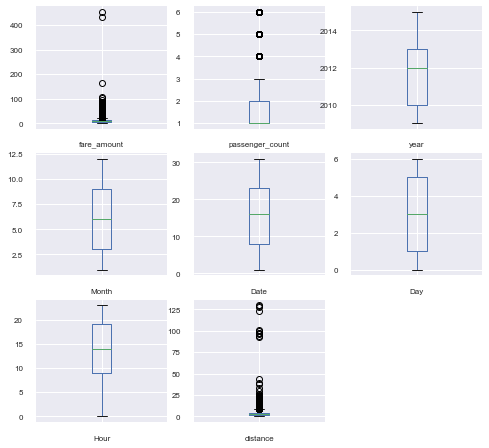

In [73]:
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()


 In Box plots analysis of individual features, we can clearly observe from these boxplots that, not every feature contains outliers and many of them even have very few outliers. We have only 16k data-points and after removing the outliers, the data gets decreased by almost 15%. So, dropping the outliers is probably not the best idea. Instead we will try to visualise and find out the outliers using box plots and will fill them with NA, that means we have created ‘missing values’ in place of outliers within the data. Now, we can treat these outliers like missing values and impute them using standard imputation techniques. In our case, we use Median imputation to impute these missing values.

In [74]:
##Detect and delete outliers from data
def outliers_analysis(df): 
    for i in df.columns:
        print(i)
        q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print(min)
        print(max)
    
        df = df.drop(df[df.loc[:,i] < min].index)
        df = df.drop(df[df.loc[:,i] > max].index)
    return(df)

In [75]:
def eliminate_rows_with_zero_value(df):
    df= df[df!= 0]
    df=df.fillna(df.median())
    return(df)

In [76]:
df.shape

(15501, 8)

fare_amount
-3.75
22.25
passenger_count
-0.5
3.5
year
2005.5
2017.5
Month
-6.0
18.0
Date
-14.5
45.5
Day
-5.0
11.0
Hour
-6.0
34.0
distance
-1.9387461131272152
6.485872690081463


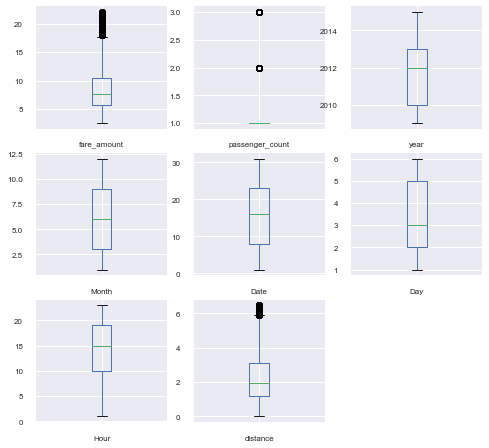

In [77]:
train_cab = outliers_analysis(train_cab)
train_cab = eliminate_rows_with_zero_value(train_cab)

train_cab.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

#### Outlier analysis in test data

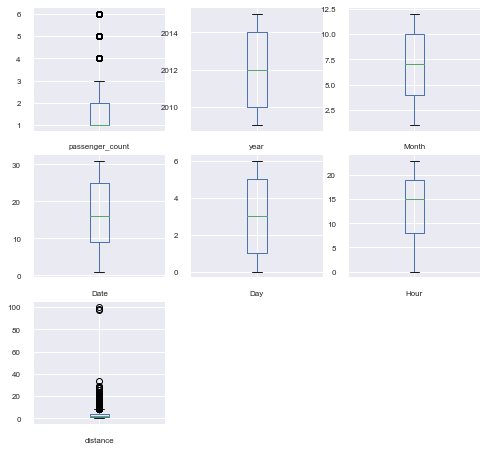

In [78]:
test_cab.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [79]:
test_cab = outliers_analysis(test_cab)
test_cab = eliminate_rows_with_zero_value(test_cab)

passenger_count
-0.5
3.5
year
2004.0
2020.0
Month
-5.0
19.0
Date
-13.5
46.5
Day
-5.0
11.0
Hour
-8.5
35.5
distance
-2.7844668306885922
8.08163065396716


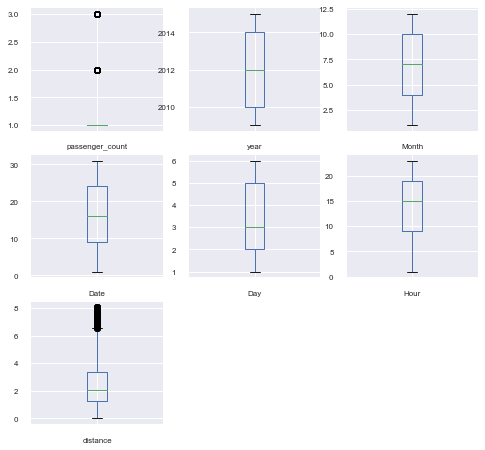

In [80]:
test_cab.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

In [81]:
train_cab=df

### Data Visualisation

Data visualisation helps us to get better insights of the data. By visualising data, we can identify areas that need attention or improvement and also clarifies which factors influence fare of the cab and how the resources are used to determine it.

#### Visualization of following:

1. Number of Passengers effects the the fare
2. Pickup date and time effects the fare
3. Day of the week does effects the fare
4. Distance effects the fare

### Univariate analysis

Univariate analysis is the simplest form of data analysis where the data being analysed contains only one variable. Since it's a single variable it doesn’t deal with causes or relationships. The main purpose of univariate analysis is to describe the data and find patterns that exist within it. So, Lets have a look at histogram plot, to identify the characteristic of the features and the data.

### Bivariate analysis
In bivariate analysis, we will look at the relationship between target variable and predictor.

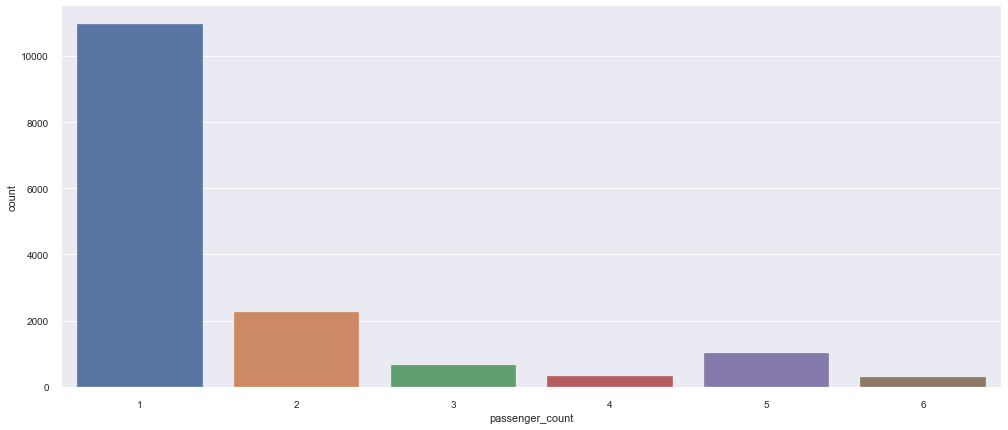

In [82]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train_cab)

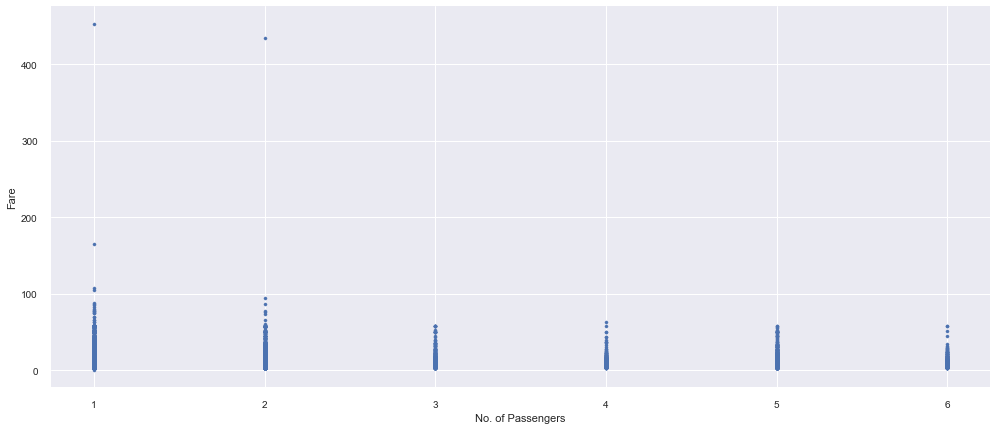

In [83]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['passenger_count'], y=train_cab['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

#### Findings :
   By seeing the above plots we can easily conclude that:
   
1. single travelling passengers are most frequent travellers.

2. At the sametime we can also conclude that highest Fare are coming from single & double travelling passengers.

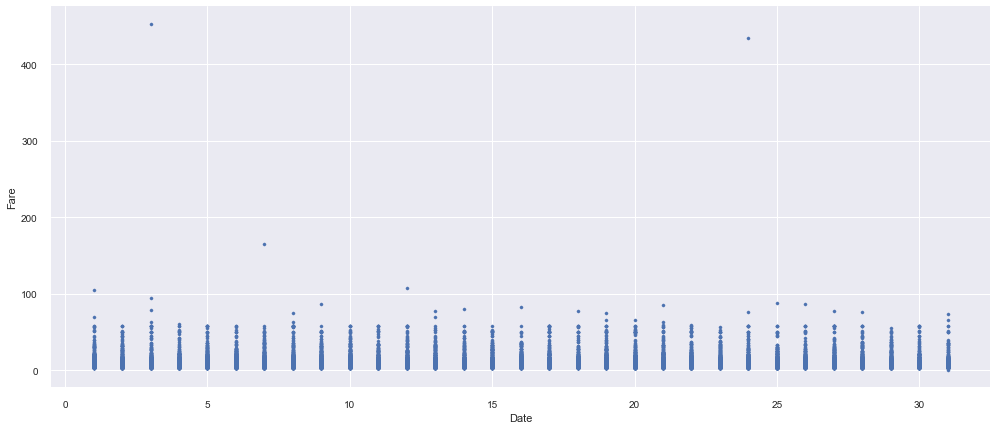

In [84]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Date'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

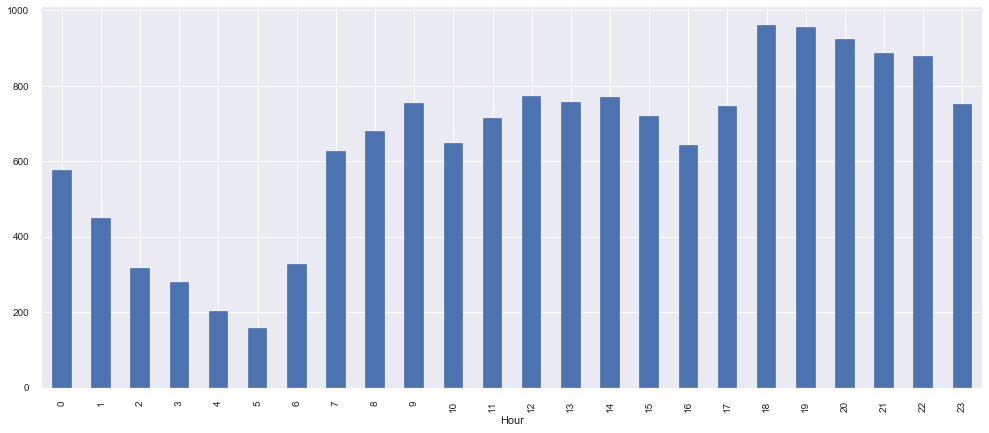

In [85]:
plt.figure(figsize=(15,7))
train_cab.groupby(train_cab["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

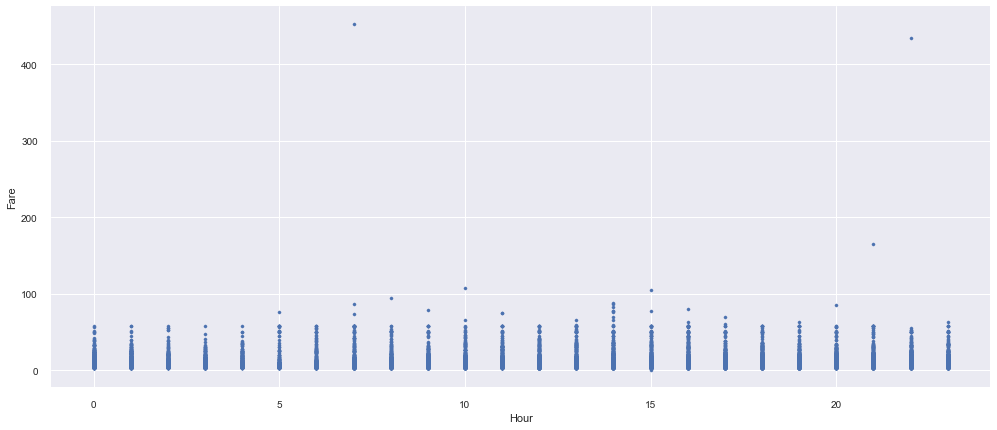

In [86]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Hour'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

From the above plot We can observe that the cabs taken at 7 am and 23 Pm are the costliest. 
Hence we can assume that cabs taken early in morning and late at night are costliest


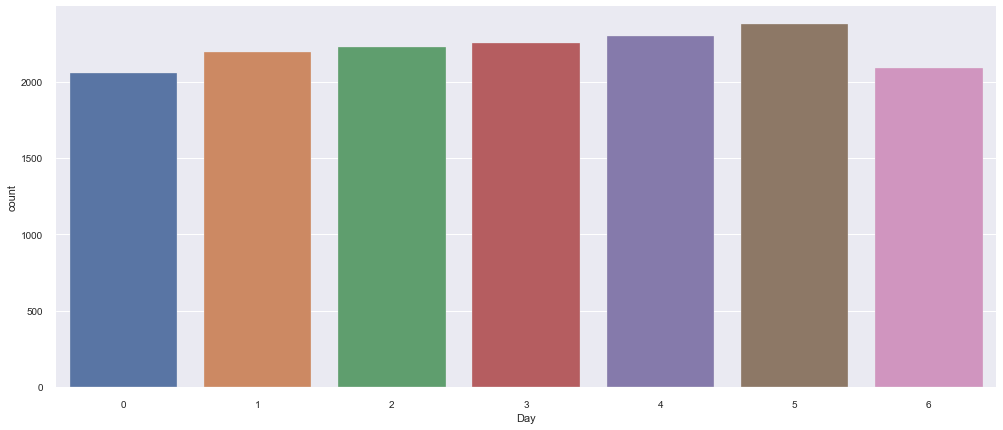

In [87]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train_cab)

Observation :
The day of the week does not seem to have much influence on the number of cabs ride

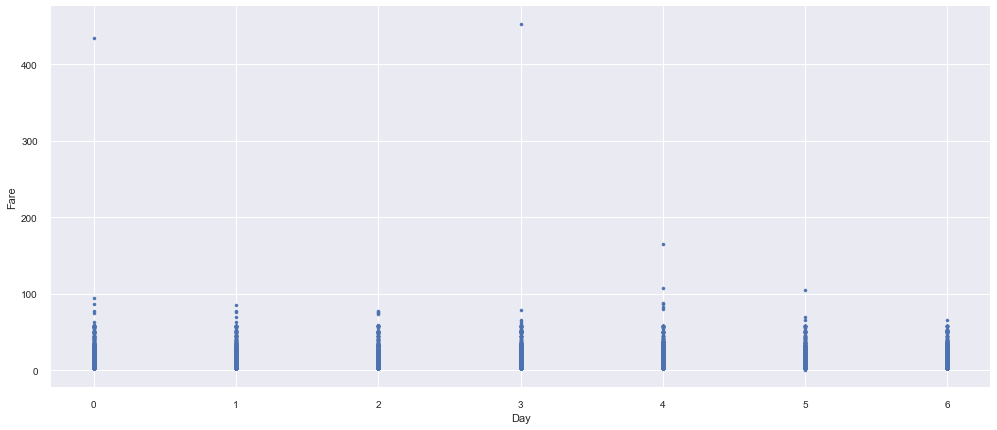

In [88]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Day'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

The highest fares seem to be on a Sunday, Monday and Thursday, and the low on Wednesday and Saturday. May be due to low demand of the cabs on saturdays the cab fare is low and high demand of cabs on sunday and monday shows the high fare prices

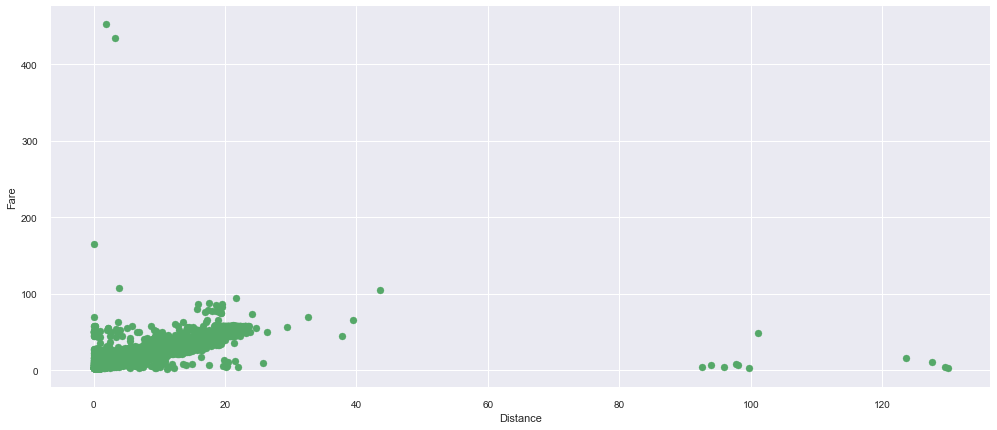

In [89]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train_cab['distance'],y = train_cab['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

### Correlation Analysis
Correlation helps us understand relationships between different attributes of the data. Since we have to predict the fare_amount in this project (Focus is on forecasting), so correlations helps us understand and exploit relationships to build better models

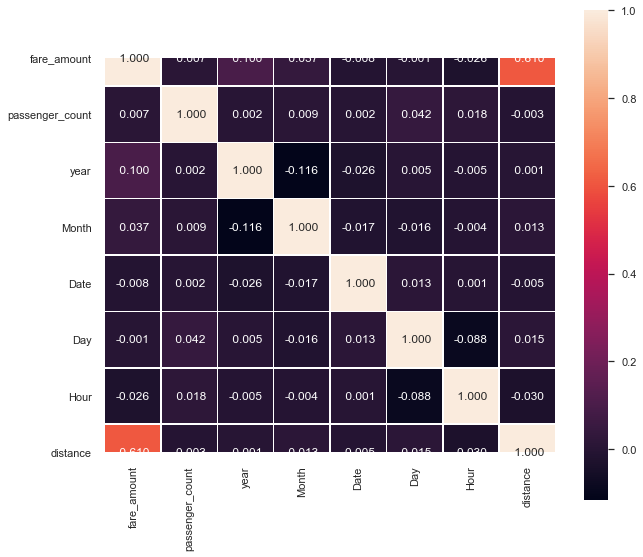

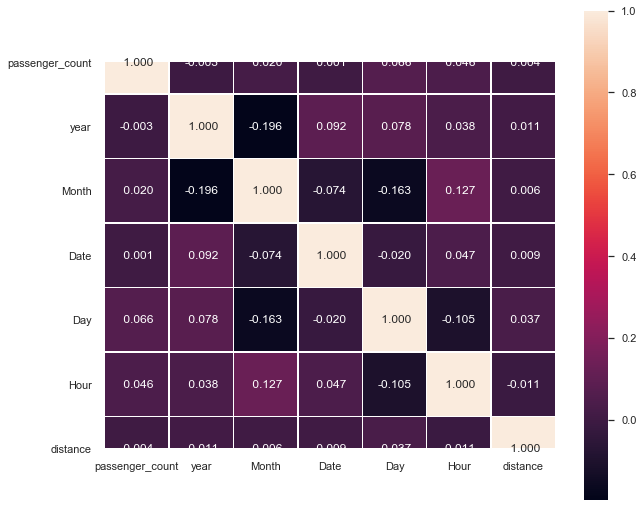

In [90]:
##Correlation analysis
#Correlation plot
def Correlation(df):
    df_corr = df.loc[:,df.columns]
    sns.set()
    plt.figure(figsize=(9, 9))
    corr = df_corr.corr()
    sns.heatmap(corr, annot= True,fmt = " .3f", linewidths = 0.5,
            square=True)
    
Correlation(train_cab)
Correlation(test_cab)

1. The value for collinearity is between -1 to 1. So, any value close to -1/1 will result in high collinearity.
2. It seems all right in our train and test data the situations nothing is more than 0.4 in positive direction and nothing is less than -0.1 in negative direction.

Therefore the datasets are free from collinearity problem

## Feature Scaling

Using the raw values as input features might make models biased toward features having really high magnitude values. These models are typically sensitive to the magnitude or scale of features like linear or logistic regression.Therefore it is recommended to normalize and scale down the features with feature scaling. Here we use Normalisation technique as the train & test _dataset are not normally distributed

### Normalisation
Normalization rescales the values into a range of [0,1]. This might be useful in some cases where all parameters need to have the same positive scale.

fare_amount


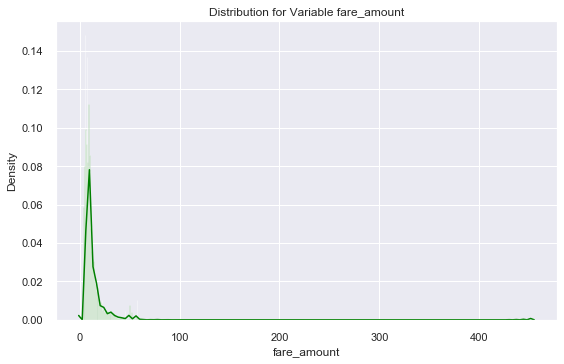

distance


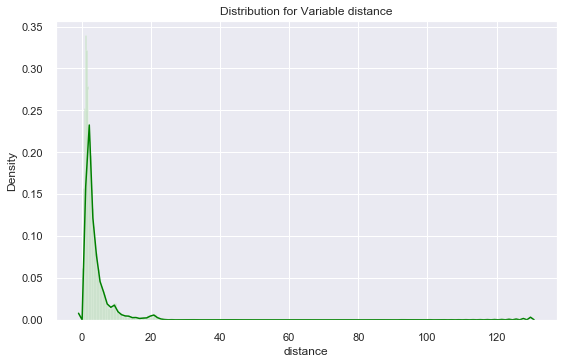

In [91]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [92]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
train_cab['fare_amount'] = np.log1p(train_cab['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train_cab['distance'] = np.log1p(train_cab['distance'])

fare_amount


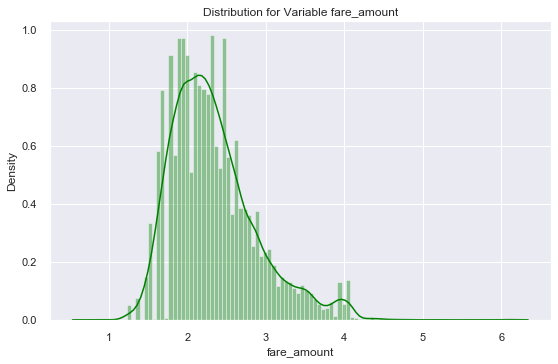

distance


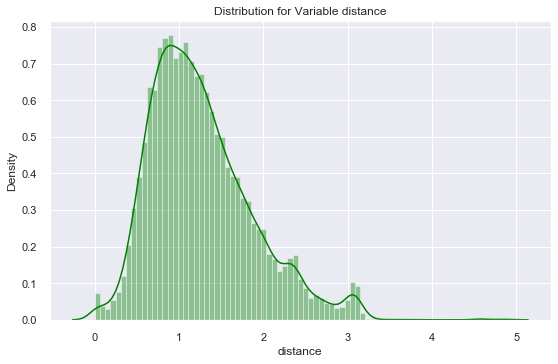

In [93]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Here we can see bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our training data

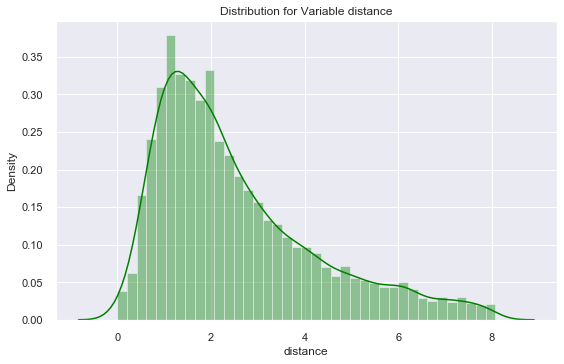

In [94]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test_cab['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [95]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test_cab['distance'] = np.log1p(test_cab['distance'])

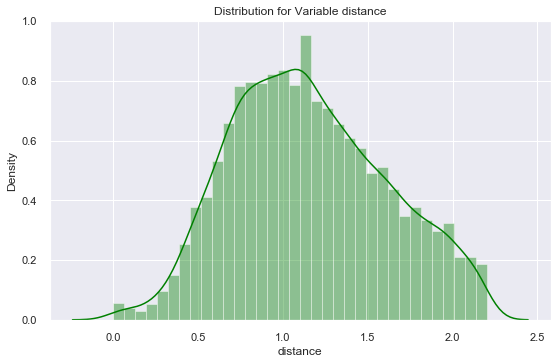

In [96]:
#rechecking the distribution for distance
sns.distplot(test_cab['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

As we can see a bell shaped distribution. Hence our continous variables are now normally distributed, we will use not use any  Feature Scalling technique. i.e, Normalization or Standarization for our test data

## Evaluating Regression Models

Predictive performance can be measured by comparing Predictions of the models with real values of the target variables, and calculating some average error measure.

#### Root Mean Square Value
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, RMSE is a measure of how spread out these residuals are.In other words, it tells you how concentrated the data is around the line of best fit. Also, Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. So, RMSE becomes more useful when large errors are particularly undesirable. So, Root Mean Square value seems like a perfect choice for our problem at hand.

#### Mean Absolute Percentage Error (MAPE)
The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning.

#### Splitting the data into train and validation sets

In [97]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train_cab.iloc[:, train_cab.columns != 'fare_amount'], 
                         train_cab.iloc[:, 0], test_size = 0.20, random_state = 1)

In [98]:
print(X_train.shape)
print(X_test.shape)

(12400, 7)
(3101, 7)


### Regression analysis
 
It is the process of investigating the relationships between dependent and independent variables. It is widely used for the predictive analysis, forecasting and time series analysis.The regression line is a straight line in this technique. The aim here is to minimize the error(sum of squared error for instance) 

## Modeling

As the process of building the model should move from simple to complex. I am starting the modeling with Multiple Linear Regression

In [99]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [100]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [101]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [102]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [103]:
print("Root Mean Squared Error For Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Train data = 0.2761331342349163
Root Mean Squared Error For Test data = 0.24330150021027377


In [104]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.743671751359199

In [105]:
r2_score(y_test, pred_test_LR)

0.7990769280403992

#### Decision Tree

Decision trees are supervised learning algorithims, simple yet powerful in modeling non-linear relationships. Being a non-parametric model, the aim of this algorithim is to learn a model that can predict outcomes based on simple decision rules based on features.

In [106]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [107]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [108]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.29963421167463683
Root Mean Squared Error For Test data = 0.2837681426493927


In [109]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.6981840250065832

In [110]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7266824550035065

#### Random Forest
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees

In [111]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [112]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [113]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

Root Mean Squared Error For Training data = 0.09528713390107413
Root Mean Squared Error For Test data = 0.23901803210354292


In [114]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9694769481881884

In [115]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8060893916944438

#### GBR Modelling
Regression Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalises them by allowing optimisation of an arbitrary differentiable loss function.

In [116]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

In [117]:
##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [118]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

Root Mean Squared Error For Training data = 0.2283322057954371
Root Mean Squared Error For Test data = 0.22797504287089637


In [119]:
#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

0.8235933925189229

In [120]:
#calculate R^2 for train data
r2_score(y_train, pred_train_GB)

0.8247355760276998

### Optimising the results with parameter tuning

In [121]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [122]:
##Random Hyperparameter Grid
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [123]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.81.
RMSE =  0.2370753020902656


In [124]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [125]:
##Random Search CV on gradient boosting model

gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.78.
RMSE =  0.25693659513229167


In [126]:
from sklearn.model_selection import GridSearchCV    
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 17}
R-squared = 0.81.
RMSE =  0.23498889812429072


In [127]:
## Grid Search CV for gradinet boosting
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.2422018444250436


### Model Selection
So, It is obvious from above model performance comparison table GBM performed better than other models comparatively on RMSE (Root Mean Square Error) and can be used for deployment.

# Prediction of fare from provided test dataset :

We have already cleaned and processed our test dataset along with our training dataset. Hence we will be predicting using grid search CV for random forest model

In [128]:
  
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test_cab)

In [129]:
predictions_GRF_test_Df

array([2.35902909, 2.40771096, 1.70289945, ..., 2.96173472, 1.79752888,
       2.02735134])

In [130]:
test_cab['Predicted_fare'] = predictions_GRF_test_Df

In [131]:
test_cab.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1.0,13.0,1.200946,2.359029
1,1,2015,1,27,1.0,13.0,1.231205,2.407711
2,1,2011,10,8,5.0,11.0,0.481579,1.702899
3,1,2012,12,1,5.0,21.0,1.085538,2.160028
4,1,2012,12,1,5.0,21.0,1.854312,2.798364


In [132]:
test_cab.to_csv('test_pred.csv')